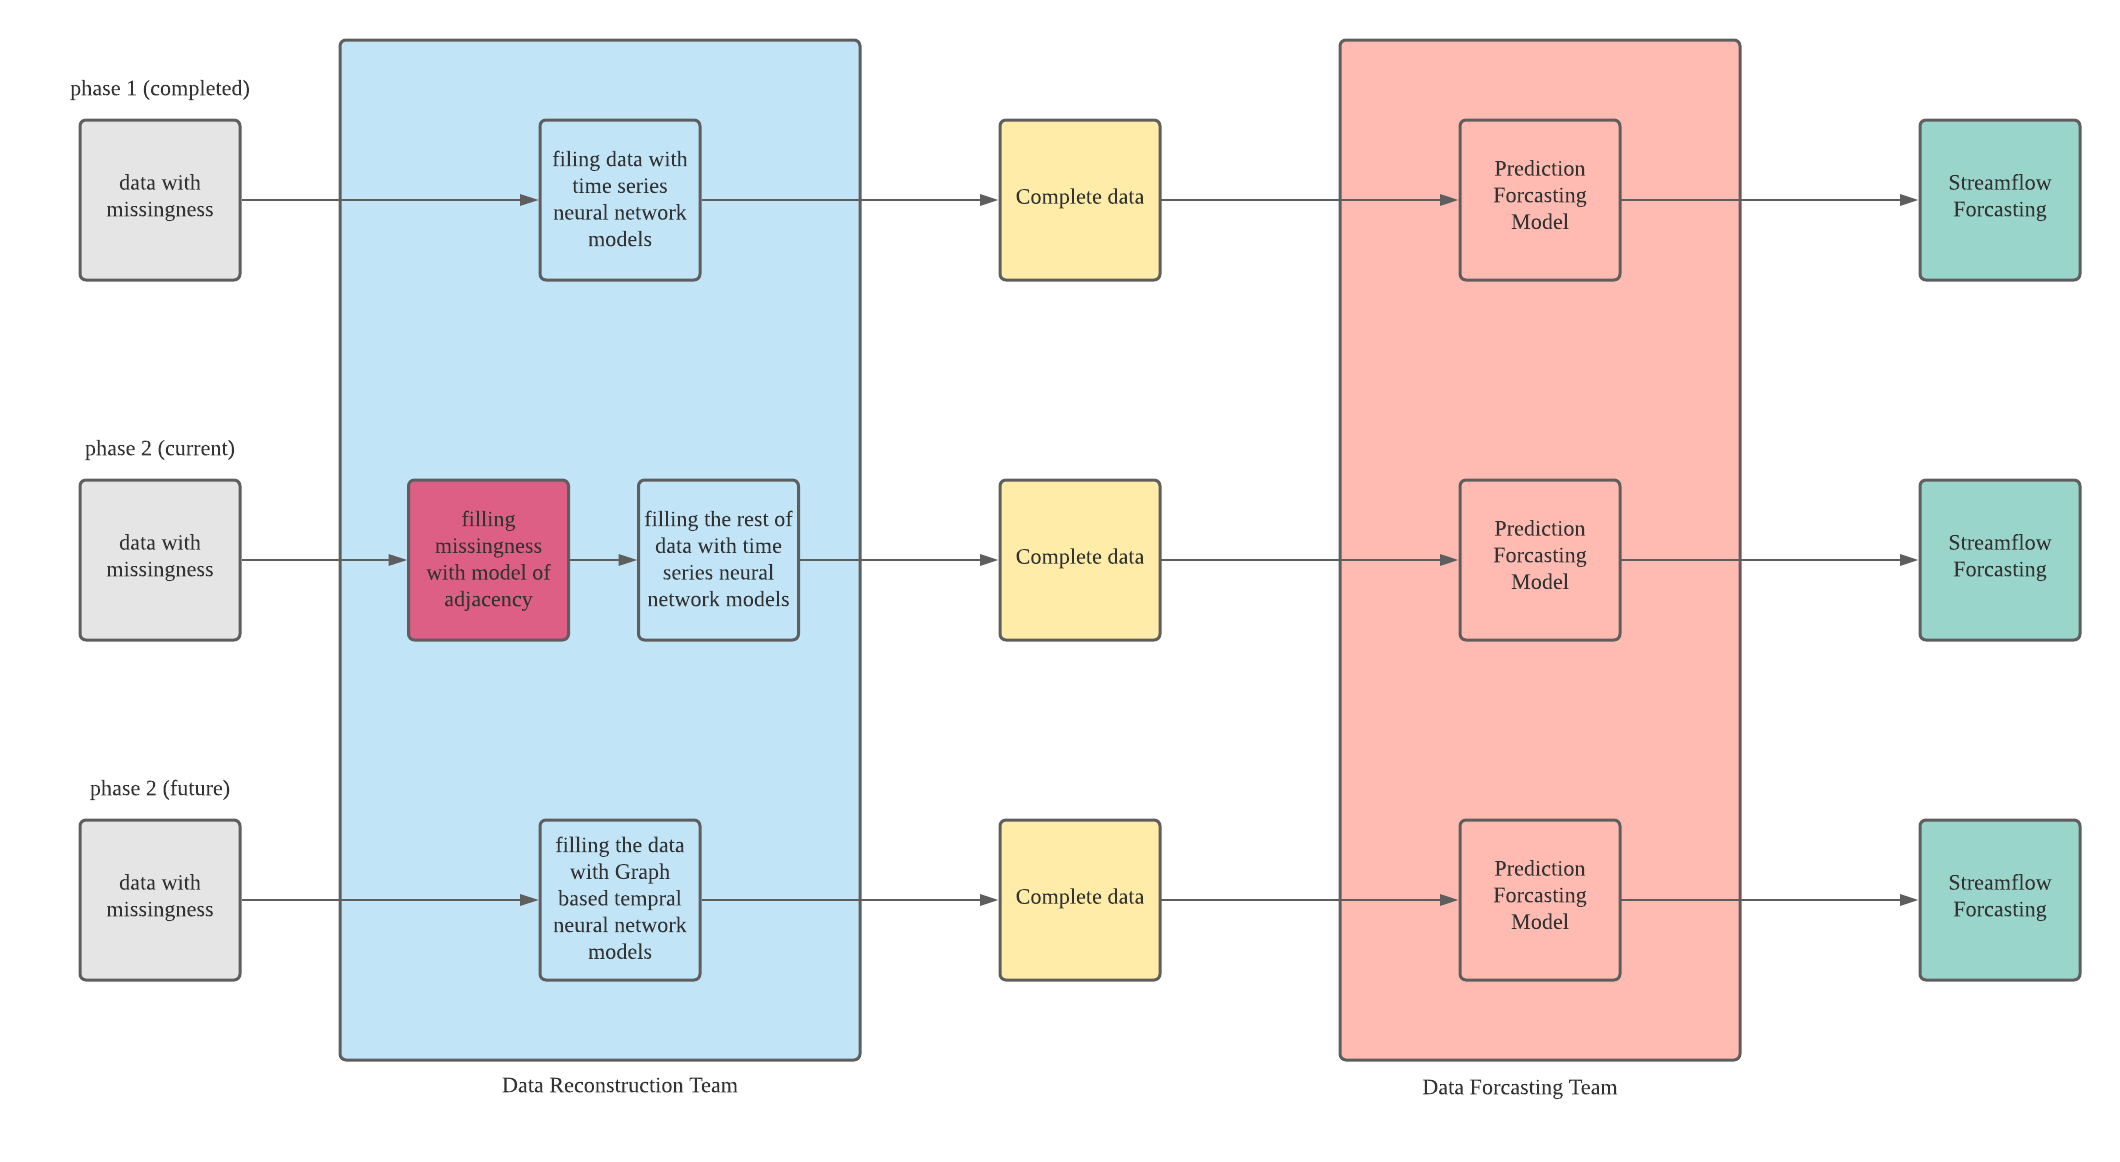

# Data Downloading from snowflake

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
root_path = '../'
config_path = os.path.join(root_path, 'config', 'config.json')
credential_path = os.path.join(root_path, 'credential', 'credential.json')
data_path = os.path.join(root_path, 'data')

if not os.path.exists(os.path.join(root_path, 'data')):
    os.mkdir(os.path.join(root_path, 'data'))
if not os.path.exists(os.path.join(root_path, 'data', 'raw')):
    os.mkdir(os.path.join(root_path, 'data', 'raw'))

In [3]:
import json

In [4]:
import sys
sys.path.append('../')
from src.data.download import Downloader

In [5]:
config = json.load(open(config_path))
credential = json.load(open(credential_path))
config.update(credential)

In [6]:
stations = config.get('stations')

In [7]:
downloader = Downloader(**config)

## Download Station Informations

In [8]:
station_info = downloader.get_station_infos(stations)

In [9]:
station_info

,STAID,STANAME,LAT_GAGE,LNG_GAGE,CLASS
0,11234760,SAN JOAQUIN R AB SHAKEFLAT C NR BIG CREEK CA,37.316611,-119.329573,Non-ref
1,11237500,PITMAN C BL TAMARACK C CA,37.198557,-119.213733,Ref
2,11238500,BIG C NR MOUTH NR BIG CREEK CA,37.207724,-119.321238,Non-ref
3,11238600,SAN JOAQUIN R AB STEVENSON C NR BIG CREEK CA,37.207724,-119.330127,Non-ref
4,11241500,STEVENSON C A SHAVER LK CA,37.144669,-119.308459,Non-ref
5,11242000,SAN JOAQUIN R AB WILLOW C NR AUBERRY CA,37.144392,-119.454577,Non-ref
6,11246500,WILLOW C A MOUTH NR AUBERRY CA,37.150781,-119.460411,Non-ref


In [14]:
station_info.to_csv(os.path.join(data_path,'raw','station_info.csv'), index=False)

## Download Streamflow of Corresponding Stations

In [15]:
streamflow = downloader.get_streamflows(stations)

In [16]:
streamflow

STAID,11234760,11237500,11238500,11238600,11241500,11242000,11246500
DATE,,,,,,,
2000-01-01,11.0,0.46,4.7,3.5,2.1,22.0,2.3
2000-01-02,11.0,0.46,4.1,3.5,2.1,22.0,2.4
2000-01-03,11.0,0.46,4.1,3.5,2.1,22.0,2.3
2000-01-04,11.0,0.46,4.1,3.5,2.1,22.0,2.3
2000-01-05,11.0,0.46,4.1,3.4,2.1,22.0,2.7
...,...,...,...,...,...,...,...
2018-09-26,30.0,0.30,8.1,3.6,5.4,48.0,58.0
2018-09-27,29.0,0.30,8.0,3.6,5.4,47.0,35.0
2018-09-28,30.0,0.30,8.1,3.6,5.4,47.0,31.0


In [18]:
streamflow.to_csv(os.path.join(data_path,'raw', 'streamflow.csv'))